In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from numpy.polynomial import polynomial as P

In [2]:
maxWORD = 4095
minWORD = 0

with open('DAC_Delay.csv', 'r', encoding='utf-8-sig') as f: 
    myData = np.genfromtxt(f, dtype=float, delimiter=',')

In [3]:
WORD=myData[:,0]
DELAY6 = myData[:,1]

In [4]:
polyDELAY6toWORD6 = P.polyfit(DELAY6,WORD,deg=20)

C:\Users\mszko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\polynomial\polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


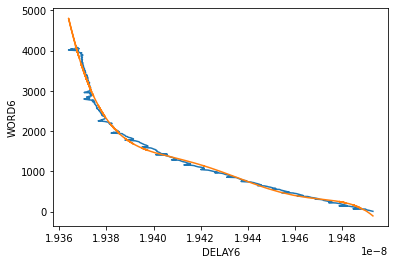

In [5]:
plt.xlabel("DELAY6")
plt.ylabel("WORD6")
plt.plot(DELAY6,WORD)
plt.plot(DELAY6,P.polyval(DELAY6,polyDELAY6toWORD6))
plt.show()

In [6]:
polyWORD1toDELAY1 = P.polyfit(WORD[np.array([0,-1])],DELAY6[np.array([0,-1])],deg=1)

In [7]:
DELAY1 = P.polyval(WORD,polyWORD1toDELAY1)

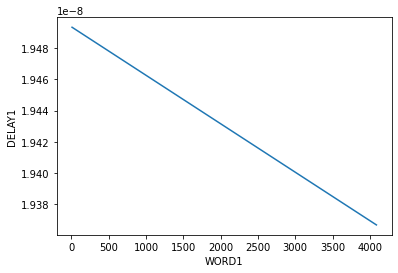

In [8]:
plt.xlabel('WORD1')
plt.ylabel('DELAY1')
plt.plot(WORD,DELAY1)
plt.show()

In [9]:
polyDELAY1toDELAY6 = P.polyfit(DELAY1,DELAY6,deg=6)

C:\Users\mszko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\polynomial\polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


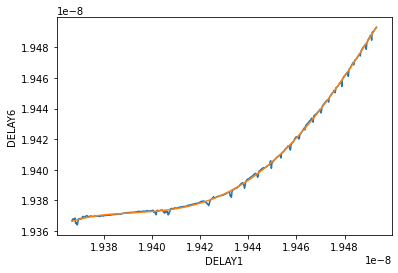

In [10]:
plt.xlabel("DELAY1")
plt.ylabel("DELAY6")
plt.plot(DELAY1,DELAY6)
plt.plot(DELAY1,P.polyval(DELAY1,polyDELAY1toDELAY6))
plt.show()

In [11]:
p = np.polynomial.Polynomial(polyWORD1toDELAY1)
p2 = np.polynomial.Polynomial(polyDELAY6toWORD6)

poly = p2(p).coef

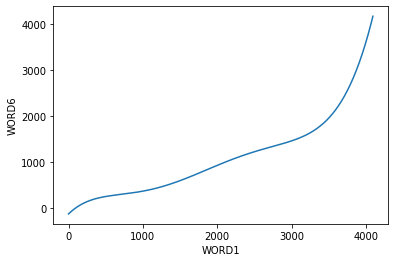

from lowest order to highest: c+bx+ax^2
[-1.18164062e+002  1.56174314e+000 -2.40503803e-003  1.87173713e-006
 -6.07051778e-010  7.31446778e-014 -8.32705182e-019  4.91704895e-024
 -1.92253561e-029  5.48088327e-035 -1.19529808e-040  2.04605754e-046
 -2.78486678e-052  3.02646978e-058 -2.61756784e-064  1.78225330e-070
 -9.36087987e-077  3.66440433e-083 -1.00771369e-089  1.73840414e-096
 -1.41649413e-103]
[-118.1640625  4168.60444848]


In [12]:
plt.xlabel("WORD1")
plt.ylabel("WORD6")


TestWORD = np.insert(WORD,0,0)
TestWORD = np.append(TestWORD,4095)
plt.plot(TestWORD,P.polyval(TestWORD,poly))
plt.show()
print("from lowest order to highest: c+bx+ax^2")
print(poly)

arr = np.array([0,4095])
print(P.polyval(arr,poly))


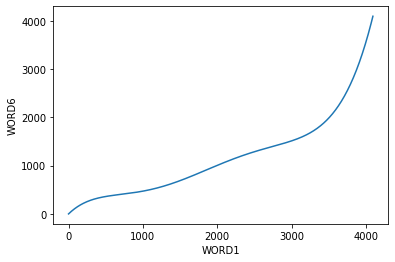

[   0. 4095.]


In [13]:
arrMin = np.min(P.polyval(TestWORD,poly))
arrMax = np.max(P.polyval(TestWORD,poly))

scaling = maxWORD/(arrMax-arrMin)

scalingPoly = np.polynomial.Polynomial([-arrMin*scaling,scaling])


Scaledpoly = scalingPoly(p2(p)).coef

plt.xlabel("WORD1")
plt.ylabel("WORD6")

plt.plot(TestWORD,P.polyval(TestWORD,Scaledpoly))
plt.show()
newWORD = P.polyval(TestWORD,Scaledpoly)
arr = np.array([minWORD,maxWORD])
print(P.polyval(arr,Scaledpoly))

In [14]:
print("from lowest order to highest: c+bx+ax^2")
print(Scaledpoly)

from lowest order to highest: c+bx+ax^2
[ 0.00000000e+000  1.49187859e+000 -2.29744869e-003  1.78800501e-006
 -5.79895328e-010  6.98725519e-014 -7.95454130e-019  4.69708485e-024
 -1.83653101e-029  5.23569605e-035 -1.14182645e-040  1.95452719e-046
 -2.66028582e-052  2.89108071e-058 -2.50047099e-064  1.70252423e-070
 -8.94212108e-077  3.50047727e-083 -9.62633639e-090  1.66063667e-096
 -1.35312729e-103]


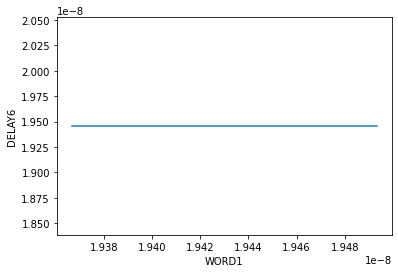

In [15]:
polyWORD6toDELAY6 = np.polynomial.Polynomial(P.polyfit(WORD,DELAY6,deg=1))
testCoeffs = polyWORD6toDELAY6(scalingPoly(p(p2))).coef
plt.xlabel("WORD1")
plt.ylabel("DELAY6")
testDELAY = P.polyval(DELAY1,testCoeffs)
plt.plot(DELAY1,testDELAY)
plt.show()